In [41]:
!pip install plotly==5.23.0
!pip install matplotlib==3.8.0
!pip install seaborn==0.12.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.3 MB 325.1 kB/s eta 0:00:54
   ---------------------------------------- 0.1/17.3 MB 372.4 kB/s eta 0:00:47
   ---------------------------------------- 0.1/17.3 MB 372.4 kB/s eta 0:00:47
   ---------------------------------------- 0.1/17.3 MB 351.4 kB/s eta 0:00:50
   ---------------------------------------- 0.1/17.3 MB 491.5 kB/s eta 0:00:35
   ---------------------------------------- 0.2/17.3 MB 544.7 kB/s eta 0:00:32
    --------------------------------------- 0.2/17.3 MB 684.7 kB/s eta 0:00:25
    --------------------------------------- 0.3/17.3 MB 785.7 kB/s eta 0:00:22
    --------------------------------------- 0.4/17.3 MB 911.8 kB/s eta 0:00:19
   - -------------------------------------- 0.5/17.3 MB 1.0 MB/s eta 0:00:17
   - -------------------------------------- 0.6/17.3 MB 1.2 MB/s eta 0:0

In [42]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [43]:
df.shape

(3554, 18)

In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [45]:
latlong = pd.read_csv('latlong.csv')

In [46]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [47]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [48]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [49]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [50]:
new_df = df.merge(latlong, on='sector')

In [51]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [52]:
# Re-run groupby and mean with clean data
numeric_cols = ['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']
group_df = new_df.groupby('sector')[numeric_cols].mean()
print(group_df)


                price  price_per_sqft  built_up_area  latitude  longitude
sector                                                                   
gwal pahari  3.192222     9585.777778    3056.166667   28.4484    77.0210
manesar      0.962258     4608.064516    2027.367742   28.3515    76.9428
sector 1     1.860000     8249.833333    2327.833333   28.3663    76.9456
sector 10    2.092857    11866.571429    1908.857143   28.4537    77.0009
sector 102   1.696636    10603.822430    1556.130841   28.4750    76.9715
...               ...             ...            ...       ...        ...
sector 91    1.648235     7586.117647    2028.647059   28.4014    76.9225
sector 92    0.934000     5928.290000    1571.341800   28.4079    76.9153
sector 93    0.848889     8009.888889    1017.000000   28.4153    76.9326
sector 95    0.480545     5602.509091     995.981818   28.4172    76.9081
sector 99    1.008095     6412.166667    1364.214286   28.4640    76.9614

[101 rows x 5 columns]


In [53]:
group_df = new_df.groupby('sector').mean()[['price','price_per_sqft','built_up_area','latitude','longitude']]

TypeError: agg function failed [how->mean,dtype->object]

In [54]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.192222,9585.777778,3056.166667,28.4484,77.0210
manesar,0.962258,4608.064516,2027.367742,28.3515,76.9428
sector 1,1.860000,8249.833333,2327.833333,28.3663,76.9456
sector 10,2.092857,11866.571429,1908.857143,28.4537,77.0009
sector 102,1.696636,10603.822430,1556.130841,28.4750,76.9715
...,...,...,...,...,...
sector 91,1.648235,7586.117647,2028.647059,28.4014,76.9225
sector 92,0.934000,5928.290000,1571.341800,28.4079,76.9153
sector 93,0.848889,8009.888889,1017.000000,28.4153,76.9326


In [55]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [56]:
new_df.to_csv('data_viz1.csv',index=False)

In [57]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [58]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,2 BHK Flat in Sector 68 Gurgaon,flat,m3m sierra 68,1.05,8536.0,1230.0,Super Built up area 1230(114.27 sq.m.)Built Up...,2,2,2,not available,"Sector 68 Gurgaon, Gurgaon, Haryana",11.0,North-East,0 to 1 Year Old,"['Airia Mall', 'Sohna Road', 'Golf Course Exte...",Beautiful landscape proper greenery with water...,"['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
1,3 BHK Flat in Sector 70A Gurgaon,flat,aipl the peaceful homes,2.40,11162.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,3,3,servant room,"11floor, Sector 70A Gurgaon, Gurgaon, Haryana",11.0,South-West,1 to 5 Year Old,"['Airia Mall', 'Golf Corse Ext. Rd.', 'Nationa...",Aipl the peaceful homes is one of the most pop...,"['5 Fan', '3 Geyser', '6 Light', '3 AC', 'No B...","['Security / Fire Alarm', 'Power Back-up', 'Fe...","['Green Area5 out of 5', 'Construction4.5 out ..."
2,2 BHK Flat in Sector 76 Gurgaon,flat,suncity avenue 76,0.75,10204.0,735.0,Super Built up area 735(68.28 sq.m.),2,2,2,not available,"Sector 76 Gurgaon, Gurgaon, Haryana",11.0,NaN,By 2023,"['Omaxe Gurgaon Mall', 'Gurugram University', ...",We are the proud owners of this 2 bhk apartmen...,[],NaN,NaN
3,7 Bedroom House for sale in Sushant Lok Phase 1,house,ansal sushant lok plots,11.50,17692.0,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000...,7,8,3+,"servant room,store room,pooja room","Built Up House, Park And North Facing, Sushant...",3.0,NaN,10+ Year Old,"['Iffco chowk metro station', 'Huda city centr...","7bhk independent house on sale, c sushant lok-...","['7 Wardrobe', '10 Fan', '1 Exhaust Fan', '7 G...","['Private Garden / Terrace', 'Water Storage', ...","['Environment5 out of 5', 'Safety4.5 out of 5'..."
4,2 BHK Flat in Ashok Vihar Phase 2,flat,ashok vihar phase 2,0.28,4307.0,650.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,1,not available,"Ashok Vihar Phase 2, Gurgaon, Haryana",3.0,North,1 to 5 Year Old,"['Sheetla Mata Mandir', 'Chintapurni Mandir', ...","Good location ,near hanuman mandir","['5 Wardrobe', 'No AC', 'No Bed', 'No Chimney'...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...","['Environment3 out of 5', 'Safety4 out of 5', ..."


In [59]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [60]:
wordcloud_df.head()

,features,sector
0,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 36
1,"['Security / Fire Alarm', 'Power Back-up', 'Fe...",sector 89
2,NaN,sohna road
3,"['Private Garden / Terrace', 'Water Storage', ...",sector 92
4,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",sector 102


In [78]:
wordcloud_df.to_csv('wordcloud_df.csv', index=False)

In [61]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [62]:
main

['Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'Water purifier',
 'Maintenance Staff',
 'Water Storage',
 'No open drainage around',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Internet/wi-fi connectivity',
 'Airy Rooms',
 'Spacious Interiors',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softening plant',
 'Security / Fire Alarm',
 'Power Back-up',
 'Feng Shui / Vaastu Compliant',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Piped-gas',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Internet/wi-fi connectivity',
 'Shopping Centre',
 'Fitness Centre / GYM',
 'Waste Disposal',
 'Rain Water Harvesting',
 'Club house / Community Center',
 'Water softeni

In [63]:
from wordcloud import WordCloud

In [64]:
feature_text = ' '.join(main)

In [65]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [66]:
feature_text

'Security / Fire Alarm Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Water purifier Maintenance Staff Water Storage No open drainage around Piped-gas Visitor Parking Swimming Pool Park Security Personnel Natural Light Internet/wi-fi connectivity Airy Rooms Spacious Interiors Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Security / Fire Alarm Power Back-up Feng Shui / Vaastu Compliant Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Piped-gas Visitor Parking Swimming Pool Park Internet/wi-fi connectivity Shopping Centre Fitness Centre / GYM Waste Disposal Rain Water Harvesting Club house / Community Center Water softening plant Private Garden / Terrace Water Storage Park Visitor Parking Waste Disposal Feng Shui / Vaastu Compliant Intercom Facility Lift(s) Maintenance Staff Swimming Pool Park V

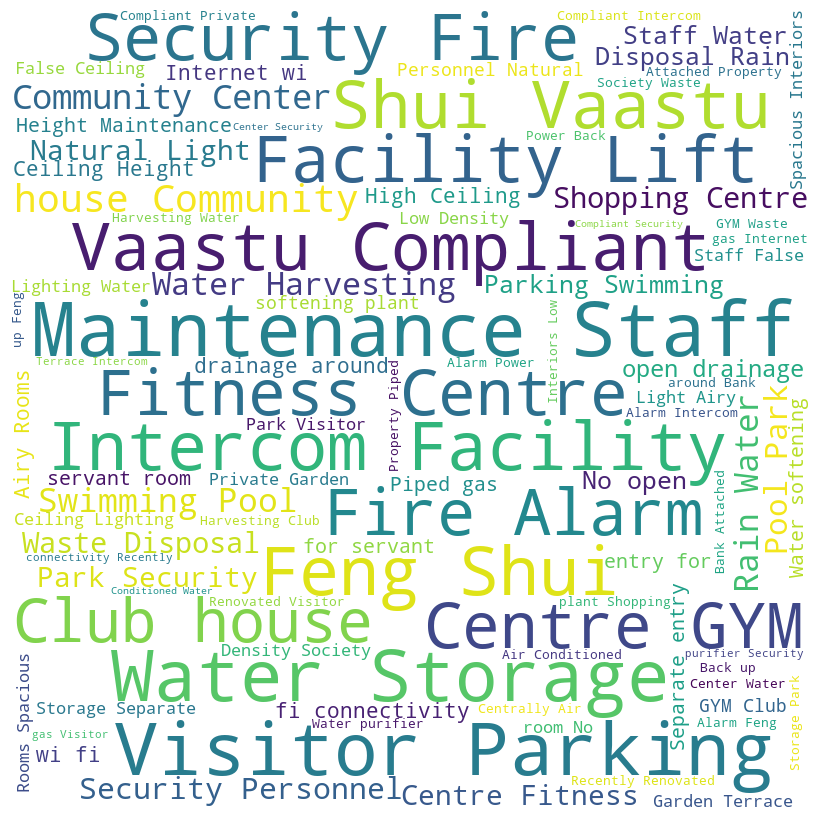

In [67]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [68]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [69]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [70]:
fig = px.pie(df, names='bedRoom', title='BHK pie chart')

# Show the plot
fig.show()

In [71]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots 
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_2252\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Vaibhav\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_2252\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to u

<Axes: xlabel='price', ylabel='Density'>

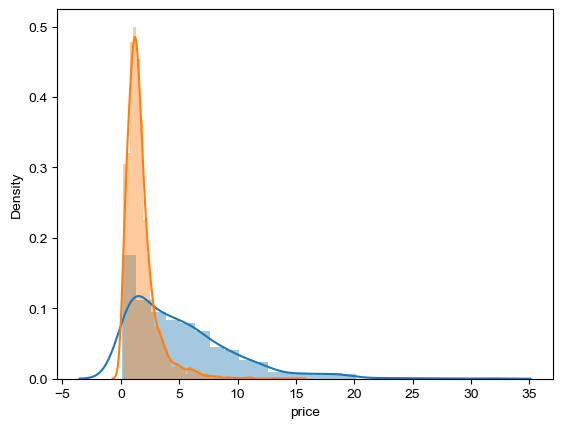

In [72]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [73]:
new_df['sector'].unique().tolist().insert(0,'overall')